In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_parquet("chicago_train_data.parquet")
df.head()

,Austin (Blue Line),Harlem/Lake (Green Line),Pulaski (Green Line),"Quincy/Wells (Brown, Orange, Purple & Pink Lines)",Davis (Purple Line),Belmont (Blue Line),Jackson (Blue Line),Sheridan (Red Line),Damen (Brown Line),Morse (Red Line),...,Irving Park (Brown Line),Western (Brown Line),Harrison (Red Line),Montrose (Brown Line),Morgan (Green & Pink Lines),Homan (Green Line),Lake (Red Line),Conservatory (Green Line),Oakton-Skokie (Yellow Line),Cermak-McCormick Place (Green Line)
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.290,0.633,0.483,0.374,0.804,1.165,0.649,1.116,0.411,1.698,...,0.327,0.715,0.502,0.338,NaN,NaN,2.942,NaN,NaN,NaN
2001-01-02,1.240,2.950,1.230,7.737,3.199,4.046,5.777,3.854,1.823,3.807,...,2.040,3.194,2.390,1.710,NaN,NaN,12.087,NaN,NaN,NaN
2001-01-03,1.412,3.107,1.394,8.051,3.476,4.153,6.482,4.147,1.905,4.047,...,2.124,3.272,2.495,1.888,NaN,NaN,12.622,NaN,NaN,NaN
2001-01-04,1.388,3.259,1.370,8.027,3.540,4.362,6.766,4.202,2.008,4.107,...,2.246,3.398,2.531,1.905,NaN,NaN,12.936,NaN,NaN,NaN
2001-01-05,1.465,3.357,1.453,7.653,3.684,4.400,6.308,4.404,2.088,4.381,...,2.362,3.346,2.202,2.049,NaN,NaN,13.043,NaN,NaN,NaN


In [3]:
missing=df.isna()

In [7]:
# Percentage of missing values for each col
(missing.mean()*100).sort_values(ascending=False)

Homan (Green Line)                         99.459271
Cermak-McCormick Place (Green Line)        89.185418
Morgan (Green & Pink Lines)                72.178615
Oakton-Skokie (Yellow Line)                71.655329
Washington (Red Line)                      48.491191
                                             ...    
Racine (Blue Line)                          0.000000
Merchandise Mart (Brown & Purple Lines)     0.000000
California (Pink Line)                      0.000000
Clinton (Blue Line)                         0.000000
Lawrence (Red Line)                         0.000000
Length: 146, dtype: float64

In [8]:
from matplotlib.colors import ListedColormap


<Axes: xlabel='date'>

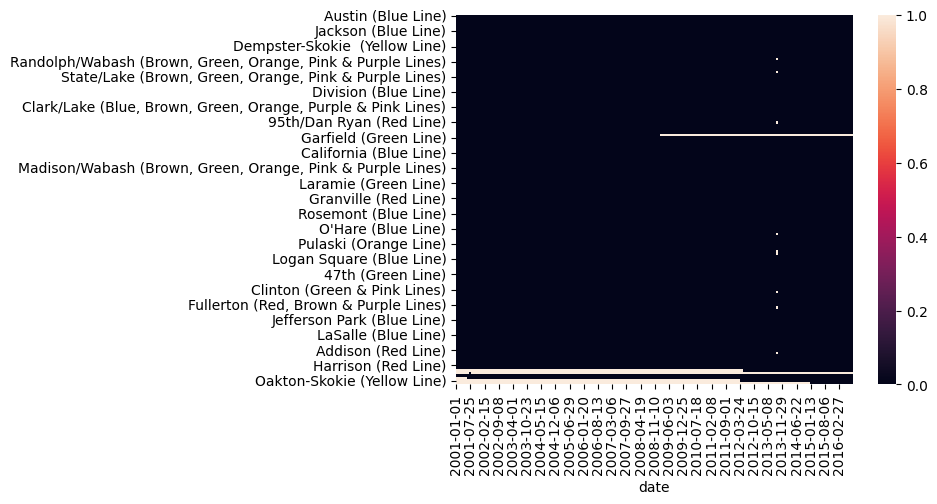

In [10]:
sns.heatmap(
    missing.T
)

In [11]:
df.shape

(5733, 146)

<Axes: xlabel='date'>

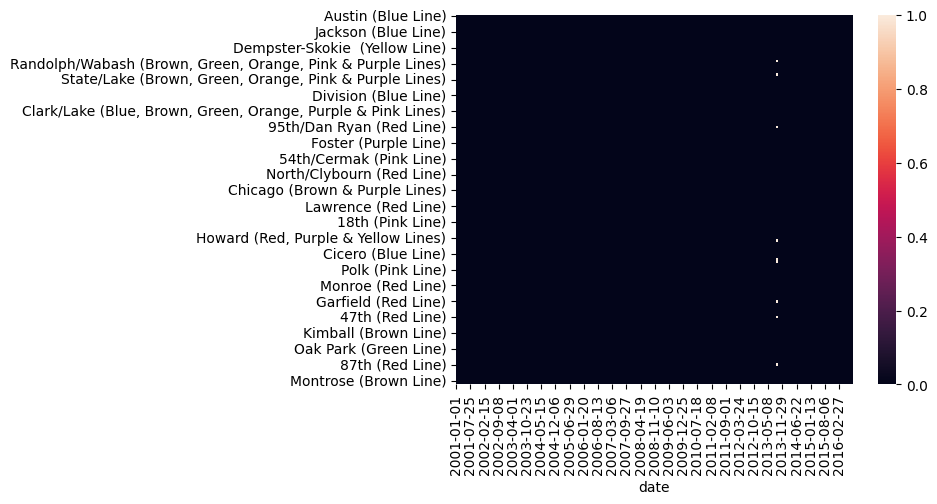

In [15]:
sns.heatmap(
    df.dropna(axis="columns",thresh=df.shape[0]-30).isna().T
)

In [16]:
bearbeitete_df=df.dropna(axis="columns",thresh=df.shape[0]-30)

In [18]:
bearbeitete_df.isna().sum().sort_values(ascending=False).head(10)

79th (Red Line)                30
69th (Red Line)                30
Sox-35th (Red Line)            30
Garfield (Red Line)            30
95th/Dan Ryan (Red Line)       30
Cermak-Chinatown (Red Line)    30
87th (Red Line)                30
63rd (Red Line)                30
47th (Red Line)                30
Polk (Pink Line)                0
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
sim_imp=SimpleImputer(
    strategy="constant",
    fill_value=bearbeitete_df.mean().mean()
    
)

In [21]:
df_imputed=pd.DataFrame(
    sim_imp.fit_transform(bearbeitete_df),
    columns=bearbeitete_df.columns,
    index=bearbeitete_df.index
)

In [24]:
df_imputed.isna().mean().sum()

0.0